<a href="https://colab.research.google.com/github/alfkry/UTS-Wine-Quality-Classification/blob/main/wineclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Classification**

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, auc)
from imblearn.over_sampling import SMOTE

sns.set_style("whitegrid")

Berikut adalah beberapa library yang digunakan dalam notebook ini. Diantaranya ada library dasar yaitu numpy dan pandas, Visualisasi data seperti seaborn, preprocessing data, split dan validasi data, model klasifikasi, evaluasi model yang semuanya dari library sklearn dan SMOTE untuk penanganan data tidak seimbang

## **1. Persiapan Data**

### Load Dataset

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/alfkry/UTS-Wine-Quality-Classification/refs/heads/main/data_training.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5,1366
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5,103
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,942
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6,811
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4,1467
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,1533
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6,1580
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6,1216


### Identifikasi Data

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB


Dataset ini terdiri dari 857 baris dan 13 kolom. Tipe data didominasi oleh float64, kecuali dua kolom bertipe int64.

Berikut adalah penjelasan masing-masing kolom:

1. `fixed acidity`          | float64       | Konsentrasi asam tetap seperti tartaric acid yang tidak mudah menguap dalam anggur.
2. `volatile acidity`       | float64       | Konsentrasi asam menguap seperti asam asetat; terlalu tinggi dapat menyebabkan bau tidak sedap.
3. `citric acid`            | float64       | Komponen alami dalam buah, memberikan rasa segar dan melindungi anggur dari bakteri.
4. `residual sugar`         | float64       | Sisa gula dalam anggur setelah fermentasi; memengaruhi rasa manis.
5. `chlorides`              | float64       | Kandungan garam (natrium klorida) dalam anggur; berpengaruh terhadap rasa.
6. `free sulfur dioxide`    | float64       | SO₂ bebas yang berfungsi sebagai antimikroba dan antioksidan.
7. `total sulfur dioxide`   | float64       | Jumlah total SO₂ (bebas dan terikat); penting dalam proses pengawetan anggur.
8. `density`                | float64       | Massa jenis anggur; dipengaruhi oleh kandungan gula dan alkohol.
9. `pH`                     | float64       | Tingkat keasaman anggur; menunjukkan konsentrasi ion hidrogen.
10. `sulphates`              | float64       | Kandungan senyawa sulfat yang berfungsi sebagai pengawet dan menambah rasa.
11. `alcohol`                | float64       | Persentase kandungan alkohol dalam anggur.
12. `quality`                | int64         | Label target berupa skor kualitas anggur (biasanya dari 0–10, berdasarkan penilaian sensorik).
13. `Id`                     | int64         | Nomor identifikasi unik untuk setiap sampel data (tidak berpengaruh terhadap prediksi).


## **2. Pembersihan Data**

### Identifikasi Missing Value

In [71]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


Berdasarkan output yang ditampilkan, hasil dari perintah `df.isnull().sum()` menunjukkan bahwa tidak ada nilai yang hilang (missing values) dalam dataset. Ini berarti dataset bersih dan tidak memerlukan penanganan tambahan untuk mengatasi missing values.

In [72]:
df = df.drop(columns=['Id'])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5
1,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5
2,10.1,0.430,0.40,2.6,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7
3,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6
4,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
852,6.7,1.040,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0,4
853,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5
854,7.4,0.350,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
855,7.9,0.570,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6


Dikarenankan kolom `id` tidak digunakan pada saat training, maka dihilangkan.

### Menormalkan variabel target

In [73]:
df["quality"].unique()

array([5, 7, 6, 4, 8, 3])

Meskipun Kualitas anggur seharusnya dari 1 hingga 10, hanya ada 6 kualitas anggur dalam dataset

In [74]:
df["quality"].value_counts(normalize = True)

,proportion
quality,
5,0.422404
6,0.397900
7,0.127188
4,0.030338
8,0.015169
3,0.007001


Dapat dilihat bahwa angka 5 dan 6 muncul lebih dari 80% dari waktu. Ini berarti data sangat tidak seimbang dan jika kita melatih data ini, model akan sangat bias. maka dari itu akan melakukan oversampling untuk mengatasi tantangan ini.

<Axes: >

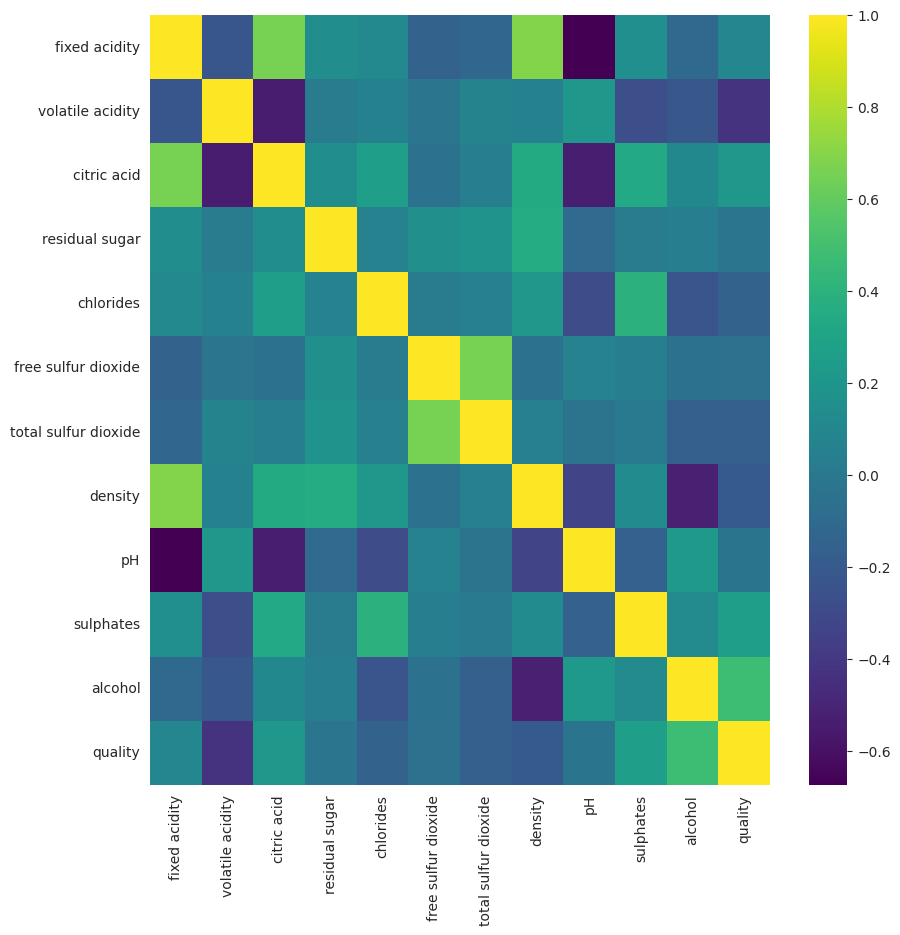

In [75]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap= 'viridis')

Sebelum melangkah lebih jauh dengan analisis, menormalkan data terlebih dahulu sehingga berada pada skala yang sama dan ini juga akan membuat model lebih mudah untuk dilatih.

In [76]:
scaler = MinMaxScaler()

min_max_df = scaler.fit_transform(df.drop("quality", axis = 1))
min_max_df = pd.DataFrame(min_max_df, columns = df.columns[:-1])

X = min_max_df
y = df['quality']

oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

X.shape, y.shape

y.value_counts()

,count
quality,
5,362
7,362
6,362
4,362
8,362
3,362


Variabel target sekarang seimbang

### Data Training & Data Testing

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Pembagian data menjadi data training dan data testing dilakukane menggunakan fungsi `train_test_split` dari pustaka `sklearn.model_selection`. Pertama, fitur-fitur (variabel independen) disimpan dalam variabel `X`, sedangkan label (variabel target) disimpan dalam variabel `y`, yaitu kolom `'quality'`. Kemudian, data dibagi menjadi 80% untuk pelatihan (`X_train`, `y_train`) dan 20% untuk pengujian (`X_test`, `y_test`). Parameter `random_state=42` digunakan untuk memastikan hasil pembagian data konsisten setiap kali kode dijalankan. Langkah ini penting agar model dapat dilatih dan dievaluasi secara adil.

## **3. Pembuatan Model**

### Modeling

In [90]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=4),
    'Random Forest': RandomForestClassifier(random_state=4),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'MLP Neural Network': MLPClassifier(max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "GradBoost": GradientBoostingClassifier()
}

evaluation_results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Simpan hasil dalam daftar
    evaluation_results.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    })

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Proses pelatihan dan evaluasi dilakukan menggunakan beberapa model machine learning, yaitu Logistic Regression, Decision Tree, Random Forest, SVM, KNN, MLP Neural Network, AdaBoost dan Gradient Boosting. Masing-masing model kemudian dilatih menggunakan data training (`X_train`, `y_train`) dan diuji pada data testing (`X_test`). Prediksi hasil model dibandingkan dengan data aktual untuk menghitung metrik evaluasi, yaitu accuracy, precision, recall, dan F1 score. Nilai-nilai ini disimpan dalam sebuah list `evaluation_results` untuk dianalisis lebih lanjut. Proses ini bertujuan untuk membandingkan performa tiap model secara objektif.

### Metric Evaluasi Model

In [89]:
# Konversi ke DataFrame
results_df = pd.DataFrame(evaluation_results)

fig = go.Figure(data=[go.Table(
    header=dict(
        values=[f"<b>{col}</b>" for col in results_df.columns],
        fill_color='white',
        line_color='black',
        align='center',
        font=dict(color='black', size=12)
    ),
    cells=dict(
        values=[results_df[col] for col in results_df.columns],
        fill_color='white',
        line_color='black',
        align='center',
        font=dict(color='black', size=12)
    )
)])

fig.update_layout(
    title=dict(
        text="Perbandingan Evaluasi Model Klasifikasi",
        x=0.5,
        xanchor='center',
        font=dict(color='black', size=20)
    ),
    margin=dict(t=30)  # Kurangi jarak atas (judul & tabel)
)

fig.show()

Berdasarkan hasil yang evaluasi, model Random Forest menunjukkan performa terbaik dengan skor (0,84) di semua metrik evaluasi, yang berarti model ini mampu mengklasifikasikan data uji dengan sangat akurat tanpa kesalahan. Model lain seperti Decission Tree, KNN, MLP Neural Network, dan Gradient Boosting memiliki akurasi yang hampir sama sekisaran 0,7. Sementara itu, model Logistic Regresion, SVM, AdaBoost memiliki 3 performa yang paling rendah dengan akurasi 0,4 sampai 0,6. Secara keseluruhan, Random Forest menjadi pilihan paling optimal untuk tugas klasifikasi pada data ini.

## **4. Prediksi Data Uji**

Karena model Random Forest yang paling optimal dari semua model, maka dilakukan pelatihan lagi dengan data training.

In [81]:
classifier = RandomForestClassifier(random_state=4)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [82]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)),1))
final_classifier = classifier

[[7 7]
 [6 5]
 [4 4]
 ...
 [5 5]
 [6 5]
 [3 3]]


Output Diatas menunjukan sebagian kecil kecocokan data prediksi dan data test

In [83]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[119   0   0   0   0   0]
 [  0 104   1   2   0   0]
 [  3   4  79  27   3   0]
 [  1   2  23  76  18   0]
 [  0   0   0  21 112   6]
 [  0   0   0   0   0 116]]


0.8451882845188284

Dapat dilihat juga confusion matrix masing-masing baris merepresentasikan kelas sebenarnya, sedangkan kolom menunjukkan prediksi model. Misalnya:
- Baris ke-0: 119 sampel dari kelas tersebut diprediksi benar 100% oleh model.
- Baris ke-2: dari 116 sampel sebenarnya, model hanya memprediksi 79 dengan benar, sisanya menyebar ke prediksi kelas lain.

Nilai akurasinya masi bernilai sama sebesar 84%

In [85]:
fin_test_data = pd.read_csv('https://raw.githubusercontent.com/alfkry/UTS-Wine-Quality-Classification/refs/heads/main/data_testing.csv')
test_data = fin_test_data.drop('Id',axis=1)
test_data = sc.fit_transform(test_data)

Masukkan data test untuk di prediksi

In [86]:
final_pred = final_classifier.predict(test_data)
final_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([5, 6, 5, 7, 5, 7, 5, 5, 5, 5, 7, 7, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6,
       5, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 7, 6, 7, 6, 7, 5,
       5, 5, 6, 7, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 7, 5, 6, 5, 5, 7, 6, 4,
       6, 6, 5, 6, 7, 4, 6, 5, 5, 4, 6, 7, 6, 6, 5, 6, 4, 4, 6, 7, 5, 5,
       5, 5, 5, 5, 5, 5, 3, 6, 5, 7, 6, 5, 5, 6, 5, 6, 5, 5, 6, 7, 5, 7,
       7, 5, 6, 6, 5, 5, 4, 7, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       6, 5, 8, 5, 5, 5, 5, 5, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 7, 6, 7, 5,
       6, 5, 6, 6, 6, 4, 5, 5, 5, 5, 6, 6, 7, 6, 4, 5, 5, 5, 5, 6, 5, 5,
       7, 6, 5, 4, 7, 6, 5, 6, 6, 5, 7, 5, 6, 6, 5, 7, 6, 6, 4, 7, 4, 6,
       7, 6, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6,
       5, 5, 5, 5, 5, 7, 5, 5, 6, 5, 7, 7, 5, 5, 6, 7, 5, 4, 5, 5, 7, 7,
       7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 7, 5,
       5, 5, 5, 7, 5, 6, 5, 7, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7])

Output diatas adalah hasil prediksi sesuai urutan id pada dataset test

In [87]:
sample_submit = pd.read_csv('https://raw.githubusercontent.com/alfkry/UTS-Wine-Quality-Classification/refs/heads/main/hasilprediksi_3digitNIMterakhir.csv')
sample_submit

,Id;Quality
0,222;
1,1514;
2,417;
3,754;
4,516;
...,...
281,1147;
282,296;
283,170;
284,1439;


Masukkan file untuk sumbit nilai prediksi berdasarkan `id`, kemudian save hasilnya dengan kode berikut

In [88]:
output = pd.DataFrame({'Id':fin_test_data.Id,'target':final_pred})
output.to_csv('hasilprediksi_011.csv', index=False)
filename = "hasilprediksi_011.csv"
print("Your submission was successfully saved!")

Your submission was successfully saved!
